# Introduction

My name is Branden from Data Science Hacktiv8 Batch 05 

This is my Milestone 1 phase 2

Every company want to at least retain their customer, one of them is a telecommunication company. This dataset provide many related information about customer who left within the last month.

### Problem

- Between customer who leave and did not leave, how bad is the ratio between them?
- We want to identify what kind of customer who leave.
- we want to check what kind of people will sign up for more services
- And of course we want to make a model to predict if the customer will leave or not, so we can give them some promo so they will stay using the company service

# Import Library

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import tensorflow as tf

In [2]:
df_full = pd.read_csv("./WA_Fn-UseC_-Telco-Customer-Churn.csv")
print(df_full.shape)
df_full.head(5)

(7043, 21)


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [3]:
df = df_full.drop(["customerID"], axis = 1)

We dont need this id column

# Data Cleaning

In [4]:
df.isnull().sum()

gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [5]:
df.isin(["", " "]).sum()

gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In the data we can see that Tenure 0 means TotalCharges is empty, that means the customer is in their first month, we can replace the value with 0 

In [6]:
df[df["TotalCharges"].isin([" "])] = 0

Then we change it's type from string to float

In [7]:
df["TotalCharges"] = df["TotalCharges"].astype(float)

In [8]:
df[df["gender"] == 0]

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0
753,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0
936,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0
1082,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0
1340,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0
3331,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0
3826,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0
4380,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0
5218,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0
6670,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0


there are also some error data, we can just erase it

In [9]:
df = df.drop(df[df["gender"] == 0].index, axis = 0)

# EDA

Define categorical and numerical column

In [10]:
categorical = df.select_dtypes(["object"]).columns.to_list()
numerical = [i for i in df if i not in categorical]

Preview the numeric column in graph

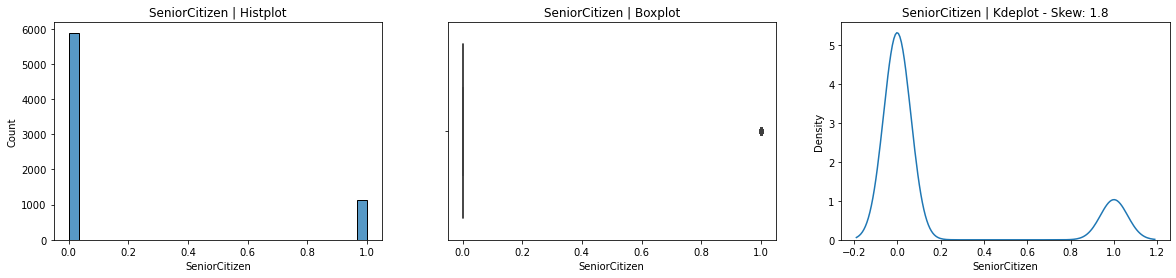

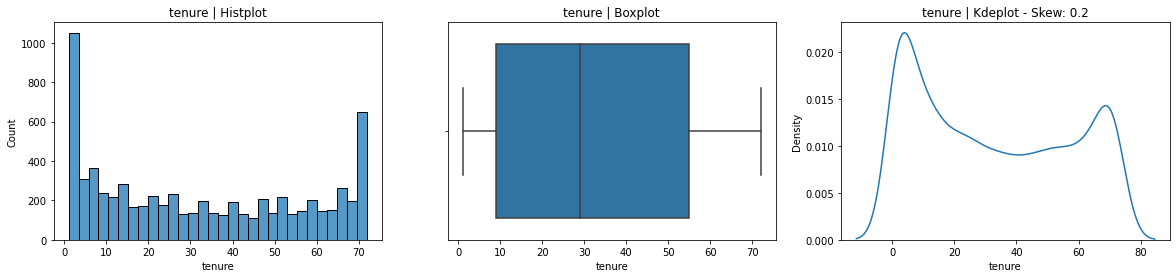

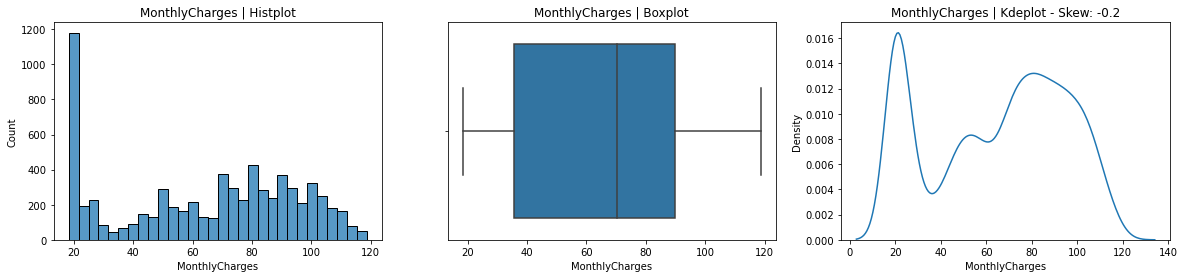

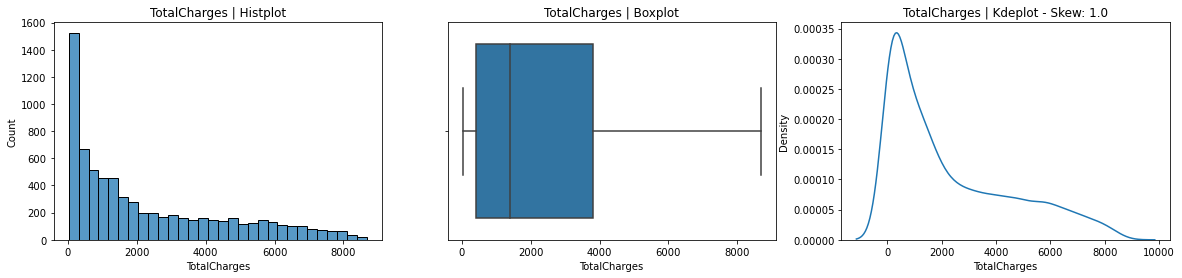

In [11]:
for i in df[numerical].columns:
    fig, ax = plt.subplots(1, 3, figsize=(20,4))
    sns.histplot(x=df[i],ax=ax[0], bins=30)
    sns.boxplot(x=df[i], ax=ax[1])
    sns.kdeplot(df[i], ax=ax[2])
    skew_val=round(df[i].skew(), 1)
    ax[0].set_title(i + " | Histplot")
    ax[1].set_title(i + " | Boxplot")
    ax[2].set_title(i + " | Kdeplot - Skew: "+str(skew_val))
    plt.show()

SenioCitizen seems like a categorical variable and the data on Total Charges is skewed

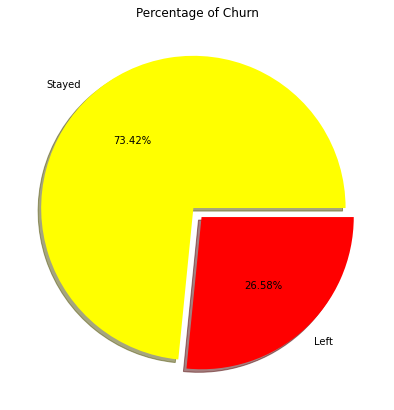

In [12]:
colors = ['yellow', 'red']
labels = ['Stayed', 'Left']
exploded = [0.04,0.04]

plt.figure(figsize = (9,7), facecolor="w")
plt.title('Percentage of Churn')
plt.pie(df.Churn.value_counts(), autopct = "%.2f%%", colors= colors, explode = exploded , shadow= True, labels=labels)
plt.show()

This is the Percentage between Customer who left within last month and Customer who didn't left, the data seems a bit imbalance

In [13]:
print("Categorical column")
for i in categorical:
    print(f"{i}: {df[i].nunique()} {str(df[i].dtype)}")

Categorical column
gender: 2 object
Partner: 2 object
Dependents: 2 object
PhoneService: 2 object
MultipleLines: 3 object
InternetService: 3 object
OnlineSecurity: 3 object
OnlineBackup: 3 object
DeviceProtection: 3 object
TechSupport: 3 object
StreamingTV: 3 object
StreamingMovies: 3 object
Contract: 3 object
PaperlessBilling: 2 object
PaymentMethod: 4 object
Churn: 2 object


for our categorical column, seemslike hist plot is good enough

Below are a really simple eda we are going to do for each column

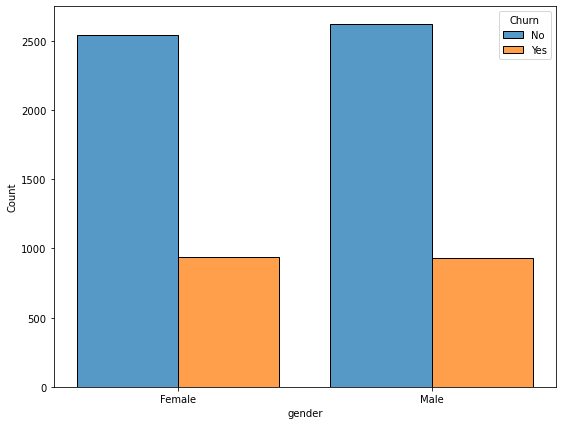

In [14]:
plt.figure(figsize = (9,7), facecolor="w")
sns.histplot(data=df, x="gender", hue="Churn", multiple="dodge", shrink=.8)
plt.show()

Gender Doesn't correlate with our target

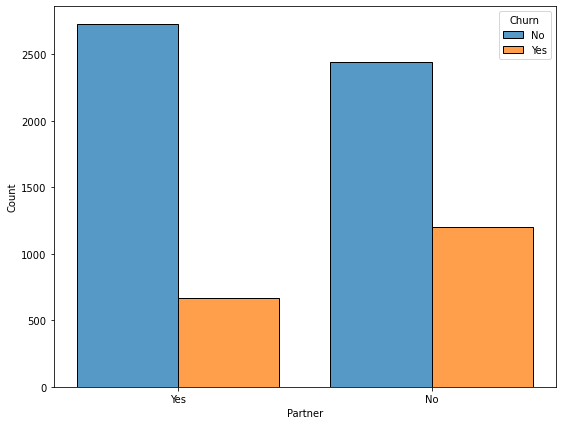

In [15]:
plt.figure(figsize = (9,7), facecolor="w")
sns.histplot(data=df, x="Partner", hue="Churn", multiple="dodge", shrink=.8)
plt.show()

Customer with no partner have more chance to leave

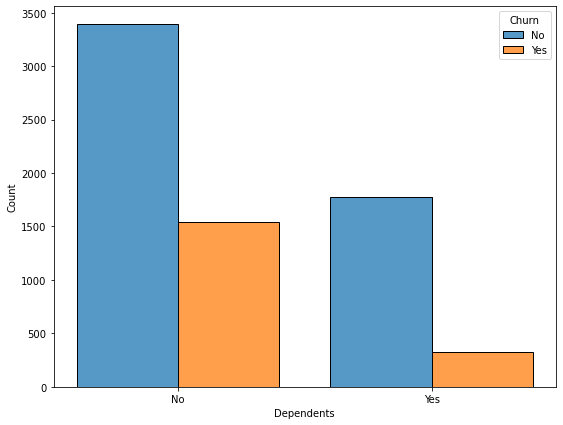

In [16]:

plt.figure(figsize = (9,7), facecolor="w")
sns.histplot(data=df, x="Dependents", hue="Churn", multiple="dodge", shrink=.8)
plt.show()

Those who isn't dependent have more chance to leave 

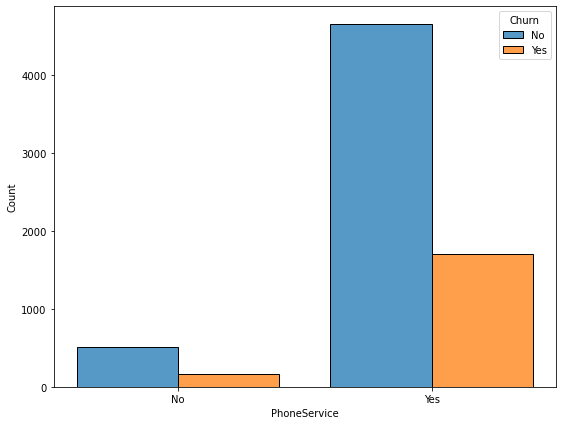

In [17]:
plt.figure(figsize = (9,7), facecolor="w")
sns.histplot(data=df, x="PhoneService", hue="Churn", multiple="dodge", shrink=.8)
plt.show()

Not much we can get from this, beside people usually signed up for phone service

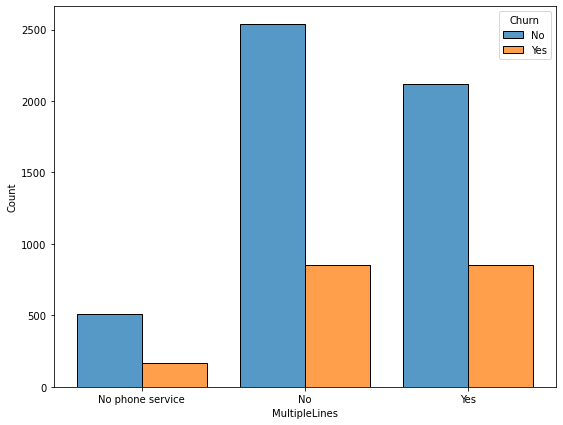

In [18]:
plt.figure(figsize = (9,7), facecolor="w")
sns.histplot(data=df, x="MultipleLines", hue="Churn", multiple="dodge", shrink=.8)
plt.show()

Nothing we can see from here

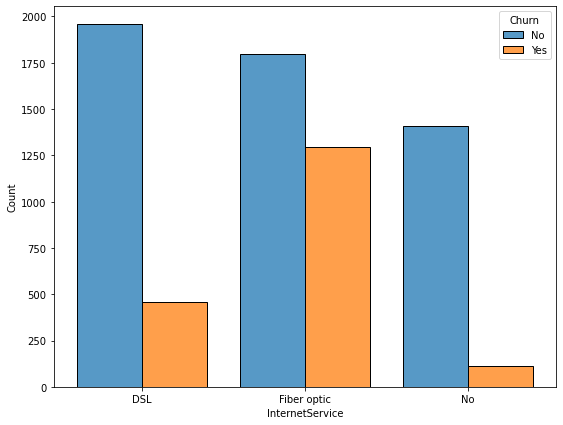

In [19]:
plt.figure(figsize = (9,7), facecolor="w")
sns.histplot(data=df, x="InternetService", hue="Churn", multiple="dodge", shrink=.8)
plt.show()

Those with fiber optic internet service have high chance to leave

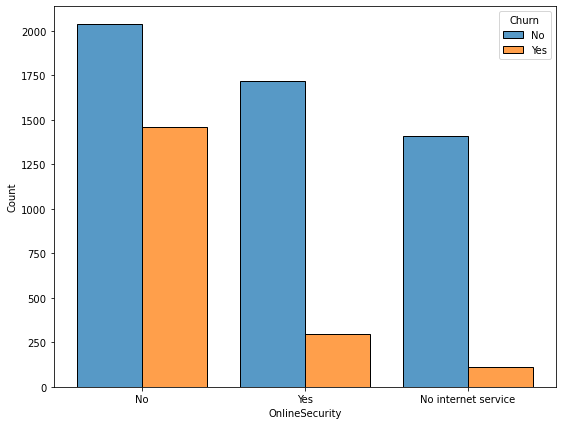

In [20]:
plt.figure(figsize = (9,7), facecolor="w")
sns.histplot(data=df, x="OnlineSecurity", hue="Churn", multiple="dodge", shrink=.8)
plt.show()

Those with No Online Security have higher chance to leave

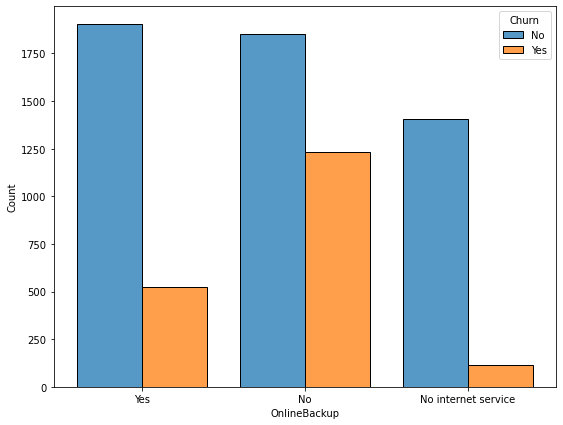

In [21]:
plt.figure(figsize = (9,7), facecolor="w")
sns.histplot(data=df, x="OnlineBackup", hue="Churn", multiple="dodge", shrink=.8)
plt.show()

Those with No Online Backup have higher chance to leave

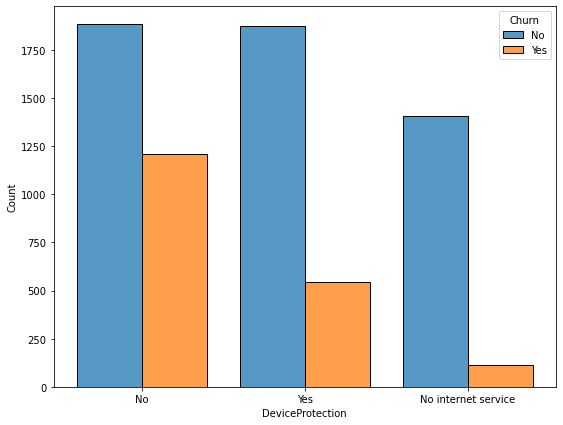

In [22]:
plt.figure(figsize = (9,7), facecolor="w")
sns.histplot(data=df, x="DeviceProtection", hue="Churn", multiple="dodge", shrink=.8)
plt.show()

Those with No Device Protection have higher chance to leave

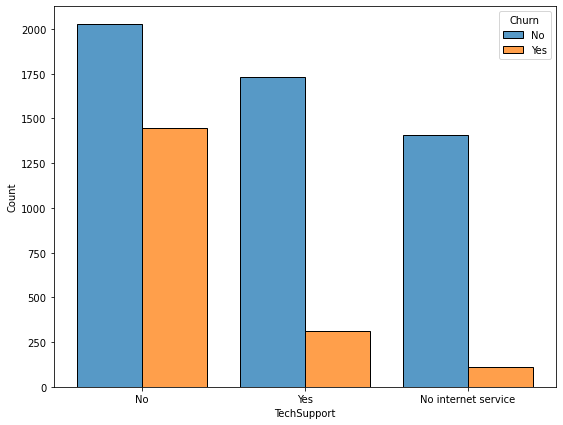

In [23]:
plt.figure(figsize = (9,7), facecolor="w")
sns.histplot(data=df, x="TechSupport", hue="Churn", multiple="dodge", shrink=.8)
plt.show()

Those with No Tech Support have higher chance to leave

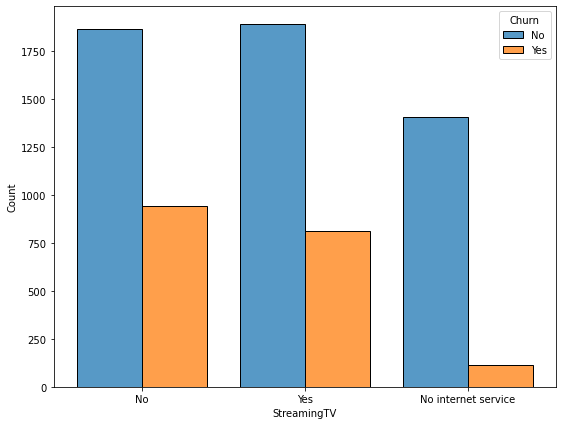

In [24]:
plt.figure(figsize = (9,7), facecolor="w")
sns.histplot(data=df, x="StreamingTV", hue="Churn", multiple="dodge", shrink=.8)
plt.show()

No internet service have less chance to leave

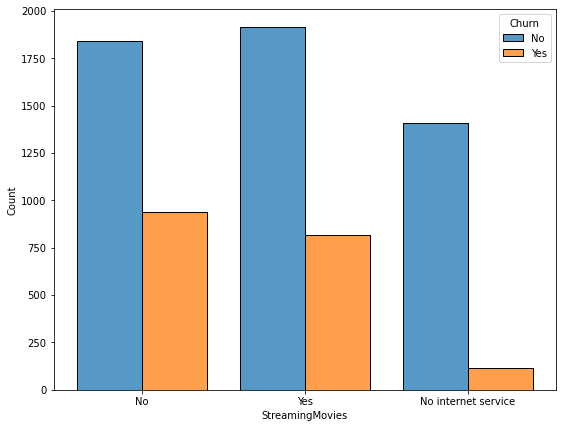

In [25]:
plt.figure(figsize = (9,7), facecolor="w")
sns.histplot(data=df, x="StreamingMovies", hue="Churn", multiple="dodge", shrink=.8)
plt.show()

This Graph is same as above

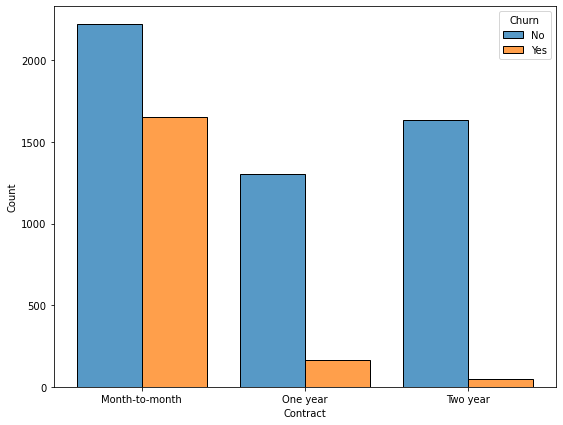

In [26]:
plt.figure(figsize = (9,7), facecolor="w")
sns.histplot(data=df, x="Contract", hue="Churn", multiple="dodge", shrink=.8)
plt.show()

Those with Month to month contract have higher chance to leave

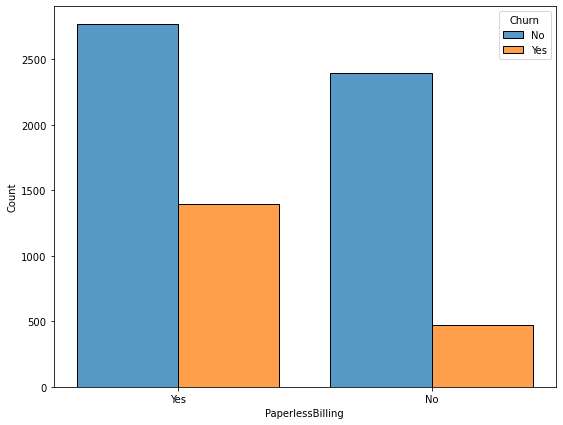

In [27]:
plt.figure(figsize = (9,7), facecolor="w")
sns.histplot(data=df, x="PaperlessBilling", hue="Churn", multiple="dodge", shrink=.8)
plt.show()

Those with Paperless Billing have higher chance to leave

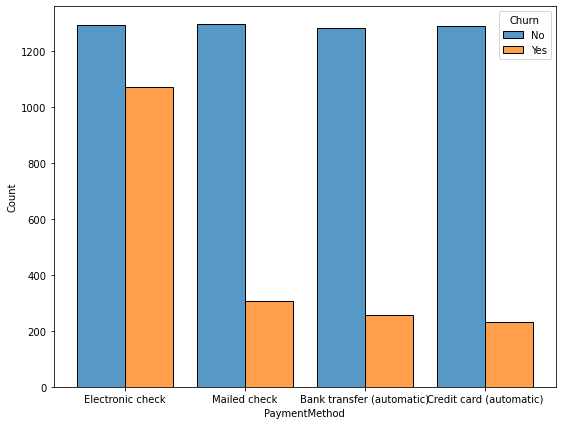

In [28]:
plt.figure(figsize = (9,7), facecolor="w")
sns.histplot(data=df, x="PaymentMethod", hue="Churn", multiple="dodge", shrink=.8)
plt.show()

Those using Electronic check payment method have higher chance to leave

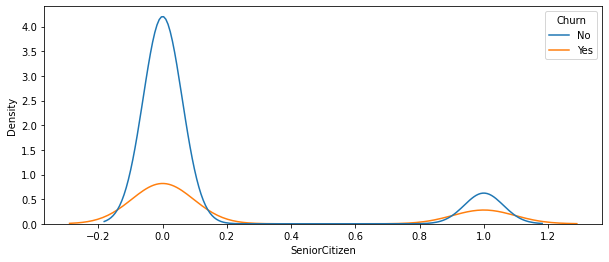

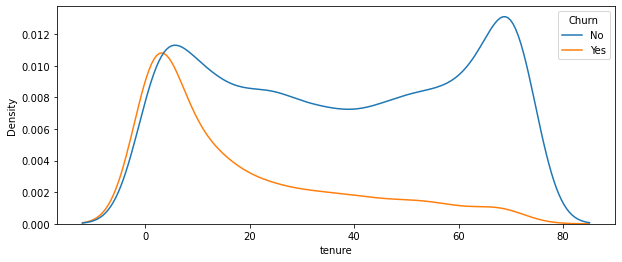

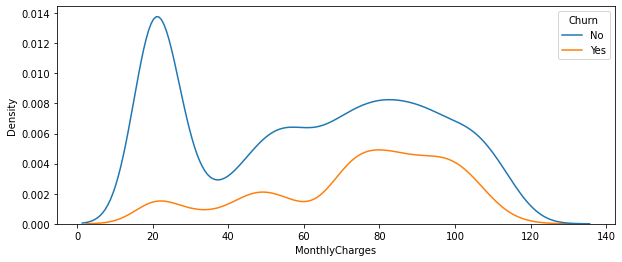

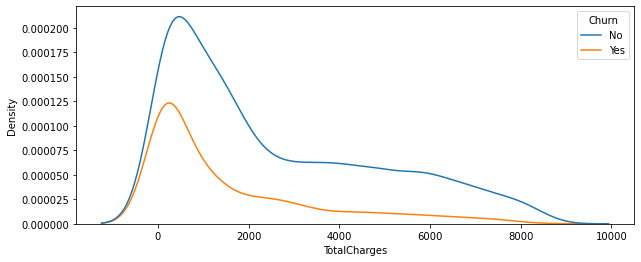

In [29]:
for col in df[numerical].columns:
    fig, ax = plt.subplots(1, 1, figsize=(10,4))
    sns.kdeplot(data=df, x=col, hue="Churn")
    # ax.set_title(col + " correlation with geek rating")
    plt.show()

Those who already been a customer for a long time will less likely to leave and those who only been a customer for a short time will leave

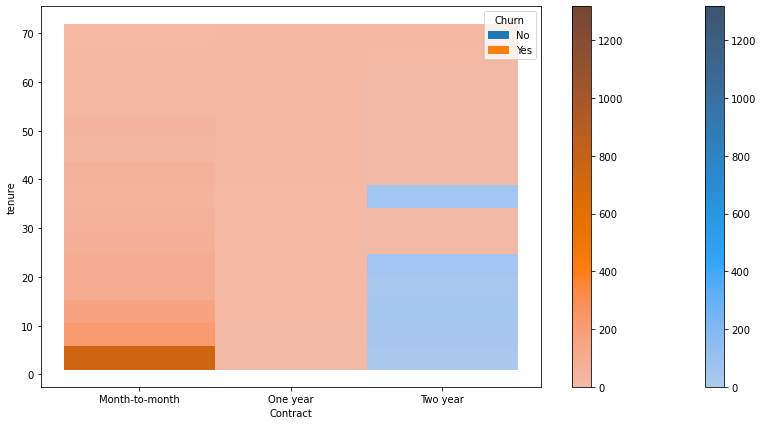

In [30]:
plt.figure(figsize = (14,7), facecolor="w")
sns.histplot(data=df, x="Contract", y="tenure", hue="Churn", cbar=True,)
plt.show()

Seems like people with Month-to-month contract will have more chance to churn, While Two year contract with low tenure did not leave

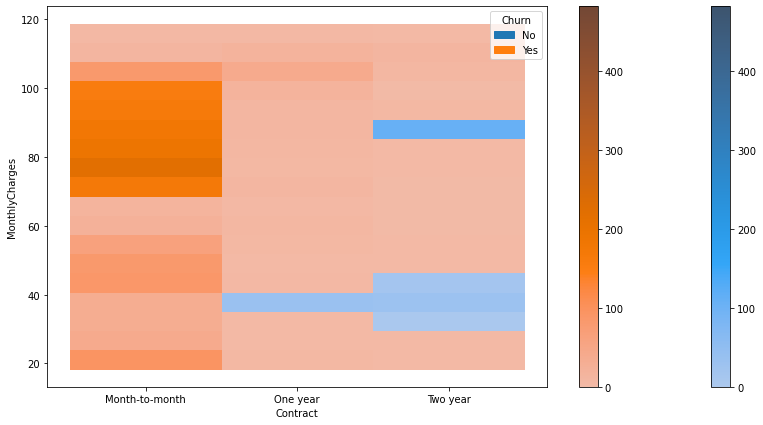

In [31]:
plt.figure(figsize = (14,7), facecolor="w")
sns.histplot(data=df, x="Contract", y="MonthlyCharges", hue="Churn", cbar=True,)
plt.show()

Those with high monthly charges in month to month contract will likely to leave, but there are also customer with two year contract who is comfortable 
with their monthly charges even if it high

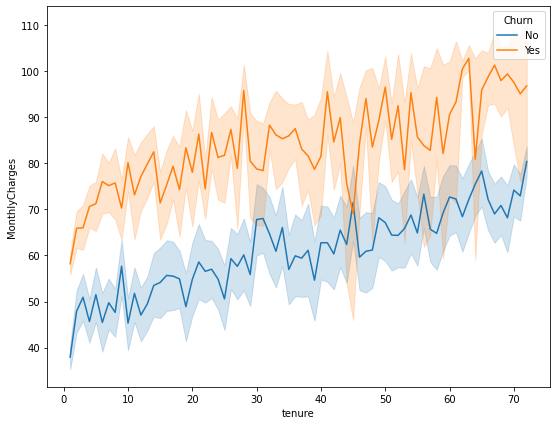

In [32]:
plt.figure(figsize = (9,7), facecolor="w")
sns.lineplot(data=df, x="tenure", y="MonthlyCharges", hue="Churn",)
plt.show()

Of course if people have to pay more, they will likely to churn.

In [33]:
def totalservices(df_services):
    df_services["MultipleLines"] = df_services["MultipleLines"].map({'Yes':2, 'No':1, "No phone service": 0})
    df_services["InternetService"] = df_services["InternetService"].map({'DSL':1, 'Fiber optic':1, "No": 0})
    df_services["OnlineSecurity"] = df_services["OnlineSecurity"].map({'Yes':1, 'No internet service':0, "No": 0})
    df_services["OnlineBackup"] = df_services["OnlineBackup"].map({'Yes':1, 'No internet service':0, "No": 0})
    df_services["DeviceProtection"] = df_services["DeviceProtection"].map({'Yes':1, 'No internet service':0, "No": 0})
    df_services["TechSupport"] = df_services["TechSupport"].map({'Yes':1, 'No internet service':0, "No": 0})
    df_services["StreamingTV"] = df_services["StreamingTV"].map({'Yes':1, 'No internet service':0, "No": 0})
    df_services["StreamingMovies"] = df_services["StreamingMovies"].map({'Yes':1, 'No internet service':0, "No": 0})
    df_services["TotalServices"] = df_services[["MultipleLines", "InternetService", "OnlineSecurity", 
                    "OnlineBackup", "DeviceProtection", "TechSupport", "StreamingTV", "StreamingMovies"]].sum(axis=1)
    df_services["TotalServices"] = df_services["TotalServices"].astype(int)
    return df_services["TotalServices"]

In [34]:
df_services = df.copy()
df_services["totalservices"] = totalservices(df_services)

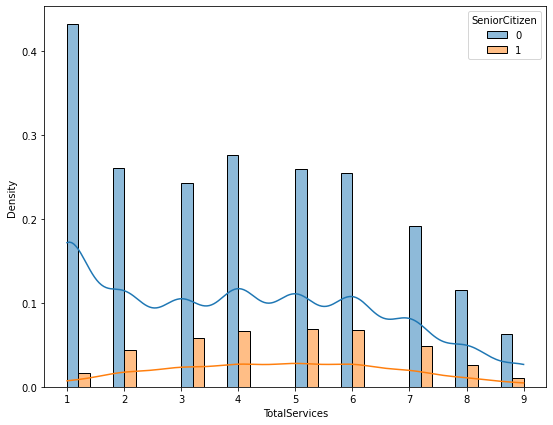

In [35]:
plt.figure(figsize = (9,7), facecolor="w")
sns.histplot(data=df_services, x="TotalServices", hue="SeniorCitizen", kde=True, stat="density", multiple="dodge")
plt.show()

looks like no correlation here

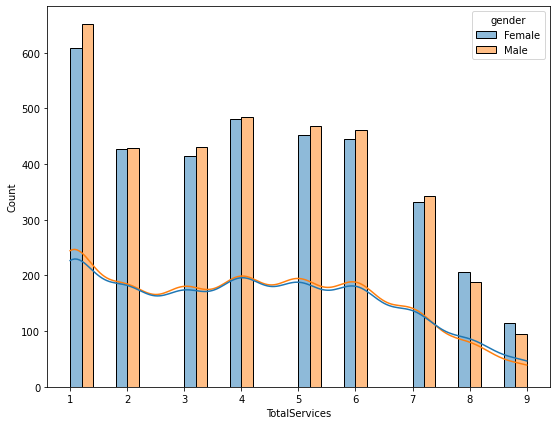

In [36]:
plt.figure(figsize = (9,7), facecolor="w")
sns.histplot(data=df_services, x="TotalServices", hue = "gender", multiple="dodge", kde=True)
plt.show()

gender also does not matter with total services

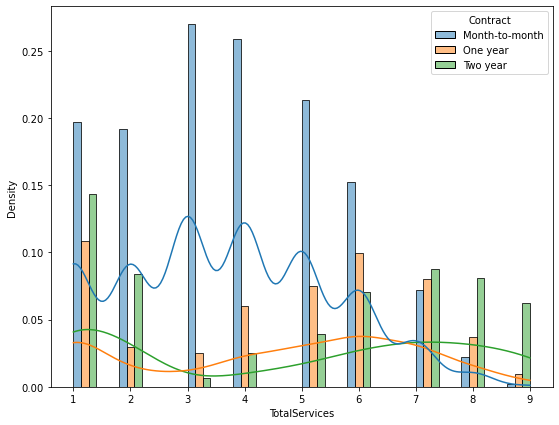

In [37]:
plt.figure(figsize = (9,7), facecolor="w")
sns.histplot(data=df_services, x="TotalServices", hue="Contract", kde=True, stat="density", multiple="dodge")
plt.show()

those with longer contract will likely to sign up for more services

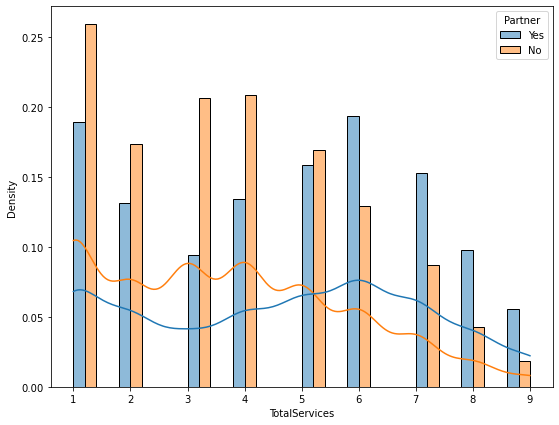

In [38]:
plt.figure(figsize = (9,7), facecolor="w")
sns.histplot(data=df_services, x="TotalServices", hue="Partner", kde=True, stat="density", multiple="dodge")
plt.show()

Those with partner will likely to sign up for more services

EDA Analysis:
- the ratio between churn and not churn is imbalance
- those who been a customer for a long time will less likely to leave
- Customer with no additional services have more chance to leave
- Customer with partner will likely to sign up for more services
- The more monthly charges they have to pay the more likely they will churn
- Some people with two years contract can be comfortable or not likely to churn even if they have to pay high monthly charge

# Preprocessing

In [39]:
df.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

Define X and y

In [40]:
# dropped_column = ["gender", "MultipleLines", "StreamingTV", "StreamingMovies", "Churn", "MonthlyCharges",]
# df["totalservices"] = totalservices(df)
X = df.drop(columns="Churn")
y = df["Churn"].map({'Yes':1, 'No':0})

we want to check which feature column is important, first we scale and encode the data

In [41]:
from sklearn.preprocessing import OneHotEncoder, StandardScaler

onehot_encoder = OneHotEncoder()
scaler = StandardScaler()

# define categorical and numerical data
categorical = X.select_dtypes(["object"]).columns.to_list()
numerical = [i for i in X if i not in categorical]

categorical_X = onehot_encoder.fit_transform(X[categorical].astype(str)).toarray()
categorical_X = pd.DataFrame(categorical_X, columns=onehot_encoder.get_feature_names_out())

numerical_y = scaler.fit_transform(X[numerical])
numerical_y = pd.DataFrame(numerical_y, columns=numerical)

concat_X = pd.concat((categorical_X, numerical_y), axis=1)


then use random forest classifier to check which feature column we gonna use

Text(0.5, 0, 'Random Forest Feature Importances')

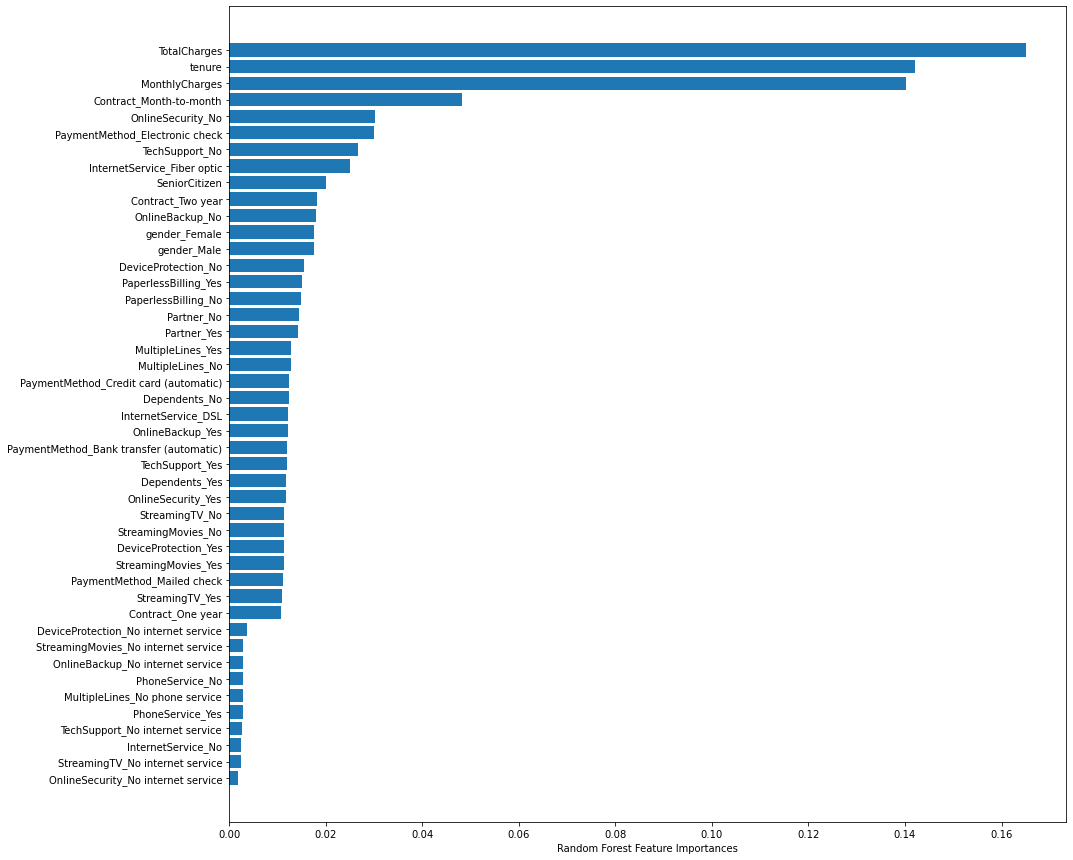

In [42]:
from sklearn.ensemble import RandomForestClassifier
rnf= RandomForestClassifier(n_estimators=500)
rnf.fit(concat_X, y)

plt.figure(figsize=(15,15))

sorted_idx= rnf.feature_importances_.argsort()
plt.barh(concat_X.columns[sorted_idx], rnf.feature_importances_[sorted_idx])
plt.xlabel('Random Forest Feature Importances')

15 seems to be a good stopping point, but lets make it 16 for the neural network

In [43]:
feature_num = 16#45-11
# cluster = X[X.columns[sorted_idx[-feature_num:]]]

split the dataset

In [44]:
from sklearn.model_selection import train_test_split

random_state = 42
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=random_state, stratify=y)

one hot encode our categorical data

In [45]:
# define one hot encode and standardscaker
onehot_encoder = OneHotEncoder()
scaler = StandardScaler()


# define categorical and numerical data
categorical = X_train.select_dtypes(["object"]).columns.to_list()
numerical = [i for i in X_train if i not in categorical]
# fit transform
categorical_train = onehot_encoder.fit_transform(X_train[categorical].astype(str)).toarray()
categorical_train = pd.DataFrame(categorical_train, columns=onehot_encoder.get_feature_names_out())

categorical_test = onehot_encoder.transform(X_test[categorical].astype(str)).toarray()
categorical_test = pd.DataFrame(categorical_test, columns=onehot_encoder.get_feature_names_out())

numerical_train = X_train[numerical].copy()
numerical_test = X_test[numerical].copy()
# numerical_test = pd.DataFrame(numerical_test, columns=numerical)


convert to tensor our numerical data

In [46]:
tf.convert_to_tensor(numerical_train)
tf.convert_to_tensor(numerical_test)

<tf.Tensor: shape=(2110, 4), dtype=float64, numpy=
array([[0.00000e+00, 1.00000e+00, 1.93000e+01, 1.93000e+01],
       [0.00000e+00, 6.00000e+00, 4.56500e+01, 3.23450e+02],
       [1.00000e+00, 7.10000e+01, 1.09700e+02, 7.90425e+03],
       ...,
       [0.00000e+00, 3.20000e+01, 9.10500e+01, 2.87150e+03],
       [0.00000e+00, 2.40000e+01, 1.97000e+01, 4.52550e+02],
       [1.00000e+00, 4.50000e+01, 9.39000e+01, 4.20025e+03]])>

define our tf normalizer and then adapt it

In [47]:
normalizer = tf.keras.layers.Normalization(axis=-1)
normalizer.adapt(numerical_train)

then we normalize it

In [48]:
numerical_train = normalizer(numerical_train)
numerical_test = normalizer(numerical_test)

then we combine our categorical and numerical data

In [49]:
numerical_train = pd.DataFrame(numerical_train.numpy(), columns=numerical)
numerical_test = pd.DataFrame(numerical_test.numpy(), columns=numerical)

# concatenate 
X_train = pd.concat((categorical_train, numerical_train), axis=1)
X_test = pd.concat((categorical_test, numerical_test), axis=1)
X_train.shape

(4922, 45)

we filter our feature column according to the random forest classifier we used before

In [50]:
X_train = X_train[X_train.columns[sorted_idx[-feature_num:]]]
X_test = X_test[X_test.columns[sorted_idx[-feature_num:]]]

split the data test to data validation and data test

In [51]:
X_test, X_val, y_test, y_val = train_test_split(X_test, y_test, test_size=0.65, random_state=random_state, stratify=y_test)

define the dataset tensor conversion function

In [52]:
BATCH_SIZE = 8
BUFFER_SIZE = 1000
def make_ds(features, labels):
    tf.convert_to_tensor(features)
    return tf.data.Dataset.from_tensor_slices((features, labels)).shuffle(BUFFER_SIZE).batch(BATCH_SIZE)

then we convert our data to tensor dataset for our tf model

In [53]:
train = make_ds(X_train, y_train)
test = make_ds(X_test, y_test) 
val = make_ds(X_val, y_val)  

# Modeling

we build our sequential tf model

In [54]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, BatchNormalization, Activation, Dropout
from tensorflow import keras
# define model
model = Sequential([
    Dense(64, input_shape=(feature_num,), activation="relu"),
    BatchNormalization(),
    Dense(32, activation="relu"),
    BatchNormalization(),
    Dense(16, activation="relu"),
    BatchNormalization(),
    Dropout(0.3),
    Dense(1, activation='sigmoid')
])

In [55]:
from tensorflow.keras.optimizers import Adam, Adamax
from tqdm.keras import TqdmCallback

tf.keras.backend.clear_session()
tf.random.set_seed(123)
optimizer = Adam(0.001)
# tqdm = TqdmCallback(verbose=1)

then we compile it

In [56]:
# compile model 
model.compile(loss='binary_crossentropy',
              optimizer=optimizer,
              metrics=['accuracy'])

train the model

In [57]:
# model fit
history = model.fit(train, epochs=50, validation_data=val, verbose=1,)

Epoch 1/50
616/616 [==============================] - 2s 2ms/step - loss: 0.5734 - accuracy: 0.7204 - val_loss: 0.4822 - val_accuracy: 0.7726
Epoch 2/50
616/616 [==============================] - 1s 1ms/step - loss: 0.4745 - accuracy: 0.7763 - val_loss: 0.4594 - val_accuracy: 0.7843
Epoch 3/50
616/616 [==============================] - 1s 2ms/step - loss: 0.4654 - accuracy: 0.7751 - val_loss: 0.4596 - val_accuracy: 0.7872
Epoch 4/50
616/616 [==============================] - 1s 1ms/step - loss: 0.4604 - accuracy: 0.7792 - val_loss: 0.4476 - val_accuracy: 0.7843
Epoch 5/50
616/616 [==============================] - 1s 1ms/step - loss: 0.4516 - accuracy: 0.7826 - val_loss: 0.4440 - val_accuracy: 0.7886
Epoch 6/50
616/616 [==============================] - 1s 1ms/step - loss: 0.4558 - accuracy: 0.7769 - val_loss: 0.4443 - val_accuracy: 0.7879
Epoch 7/50
616/616 [==============================] - 1s 1ms/step - loss: 0.4549 - accuracy: 0.7739 - val_loss: 0.4423 - val_accuracy: 0.7886
Epoch 

# Model Evaluation

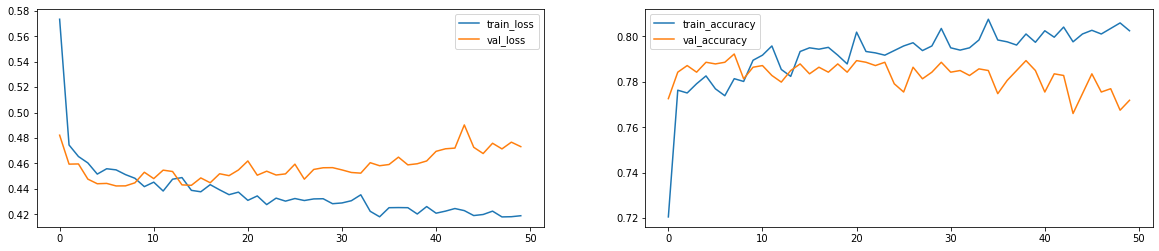

In [88]:
fig, ax = plt.subplots(1, 2, figsize=(20,4))
ax[0].plot(history.history['loss'], label='train_loss',)
ax[0].plot(history.history['val_loss'], label='val_loss',)
ax[1].plot(history.history['accuracy'], label='train_accuracy',)
ax[1].plot(history.history['val_accuracy'], label='val_accuracy',)
ax[0].legend()
ax[1].legend()

the model seems to be easily overfit

In [59]:
def binary_class(y):
    return np.where(y < 0.5, 0, 1)

In [60]:
from sklearn.metrics import classification_report
y_test_pred = model.predict(X_test)
print(classification_report(y_test, binary_class(y_test_pred)))

              precision    recall  f1-score   support

           0       0.83      0.88      0.86       542
           1       0.61      0.49      0.54       196

    accuracy                           0.78       738
   macro avg       0.72      0.69      0.70       738
weighted avg       0.77      0.78      0.77       738



our evaluation also tell us this is a bad model

# Model Improvement

this is a block layer we gonna use to build the improved model

In [61]:
from tensorflow.keras.constraints import max_norm
seed = 123
class LinearBlock(keras.layers.Layer):
    def __init__(self, neurons, kernel_initializer=tf.keras.initializers.HeNormal(seed=seed), activation="relu", dropout = 0.0):
        super(LinearBlock, self).__init__()
        self.linear = Dense(neurons, kernel_regularizer = tf.keras.regularizers.L2(0.01),
                            kernel_initializer=kernel_initializer)
        self.bn = BatchNormalization()
        self.relu = Activation(activation)
        self.dropout = Dropout(dropout)
    def call(self, inputs):
        x = self.linear(inputs)
        x = self.bn(x)
        x = self.relu(x)
        return self.dropout(x)

we gonna use some callback methods

In [62]:
from tensorflow.keras.callbacks import ReduceLROnPlateau, ModelCheckpoint
import absl.logging
filepath = ("./streamlit_deploy/checkpoint/")
optimizer = Adam(0.001)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5, cooldown=1,
                              patience=3, min_lr=0.0001)
checkpoint = ModelCheckpoint(filepath, monitor='val_accuracy', verbose=0, save_best_only=True,
                            save_weights_only=True, mode='auto', save_freq='epoch',)
# absl.logging.set_verbosity(absl.logging.ERROR)

build our improved model

In [63]:
def make_model():
    inputs = keras.Input(shape=(feature_num))
    x = LinearBlock(16, )(inputs)
    # x = LinearBlock(16, )(x)
    x = tf.keras.layers.Add()([x, inputs])
    x = LinearBlock(8, dropout = 0.2)(x)
    outputs = Dense(1, activation="sigmoid", kernel_initializer=tf.keras.initializers.GlorotNormal(seed=seed))(x)
    model2 = tf.keras.models.Model(inputs, outputs)
    model2.compile(loss='binary_crossentropy',
              optimizer=optimizer,
              metrics=['accuracy'])
    return model2

train the improved model

In [64]:
tf.keras.backend.clear_session()
model2 = make_model()
history2 = model2.fit(train, epochs=75, validation_data=val, verbose=1, callbacks=[reduce_lr, checkpoint])

Epoch 1/75
616/616 [==============================] - 1s 1ms/step - loss: 0.8158 - accuracy: 0.7393 - val_loss: 0.6289 - val_accuracy: 0.7748 - lr: 0.0010
Epoch 2/75
616/616 [==============================] - 1s 1ms/step - loss: 0.5764 - accuracy: 0.7794 - val_loss: 0.5261 - val_accuracy: 0.7806 - lr: 0.0010
Epoch 3/75
616/616 [==============================] - 1s 987us/step - loss: 0.5206 - accuracy: 0.7757 - val_loss: 0.4893 - val_accuracy: 0.7974 - lr: 0.0010
Epoch 4/75
616/616 [==============================] - 1s 954us/step - loss: 0.4958 - accuracy: 0.7712 - val_loss: 0.4749 - val_accuracy: 0.7901 - lr: 0.0010
Epoch 5/75
616/616 [==============================] - 1s 946us/step - loss: 0.4820 - accuracy: 0.7731 - val_loss: 0.4656 - val_accuracy: 0.7915 - lr: 0.0010
Epoch 6/75
616/616 [==============================] - 1s 1ms/step - loss: 0.4707 - accuracy: 0.7731 - val_loss: 0.4638 - val_accuracy: 0.7821 - lr: 0.0010
Epoch 7/75
616/616 [==============================] - 1s 1ms/ste

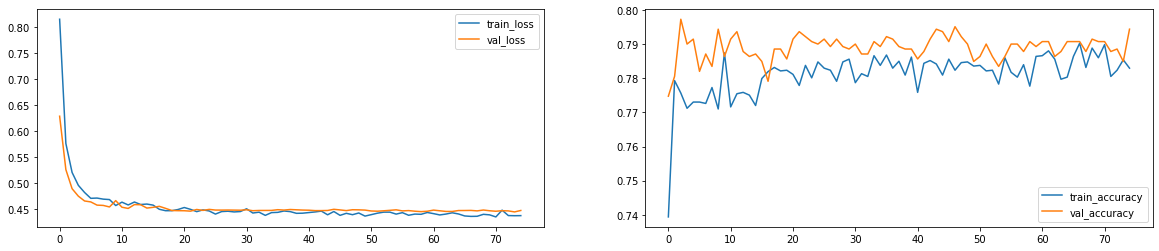

In [87]:
fig, ax = plt.subplots(1, 2, figsize=(20,4))
ax[0].plot(history2.history['loss'], label='train_loss',)
ax[0].plot(history2.history['val_loss'], label='val_loss',)
ax[1].plot(history2.history['accuracy'], label='train_accuracy',)
ax[1].plot(history2.history['val_accuracy'], label='val_accuracy',)
ax[0].legend()
ax[1].legend()

our model did not easily overfit and have a good convergence

In [67]:
from sklearn.metrics import classification_report
y_test_pred = model2.predict(X_test)
print(classification_report(y_test, binary_class(y_test_pred)))

              precision    recall  f1-score   support

           0       0.85      0.90      0.87       542
           1       0.67      0.56      0.61       196

    accuracy                           0.81       738
   macro avg       0.76      0.73      0.74       738
weighted avg       0.80      0.81      0.80       738



the result is also got better

# Model Saving

the checkpoint callbacks method already saved the best epoch from our training, so we gonna load it and evaluate our best model again

In [68]:
# Save the weights
# model2.save_weights('./checkpoints/my_checkpoint')

# Create a new model instance
model3 = make_model()

# Restore the weights
model3.load_weights(filepath)

# Evaluate the model
loss, acc = model3.evaluate(X_test, y_test, verbose=1)
print(loss, acc)
y_test_pred = model3.predict(X_test)
print(classification_report(y_test, binary_class(y_test_pred)))

24/24 [==============================] - 0s 690us/step - loss: 0.4238 - accuracy: 0.8130
0.42383483052253723 0.8130081295967102
              precision    recall  f1-score   support

           0       0.87      0.87      0.87       542
           1       0.65      0.64      0.65       196

    accuracy                           0.81       738
   macro avg       0.76      0.76      0.76       738
weighted avg       0.81      0.81      0.81       738



the result got a bit better

save our one hot encoder

In [69]:
from joblib import dump, load
dump(onehot_encoder, './streamlit_deploy/onehot_encoder.joblib')


['./streamlit_deploy/onehot_encoder.joblib']

save our normalizer

In [70]:
normalizer_model = tf.keras.Sequential(normalizer)
normalizer_model.compile()
normalizer_model.save('./streamlit_deploy/normalizer.tf', save_format='tf')

INFO:tensorflow:Assets written to: ./streamlit_deploy/normalizer.tf\assets


and save our feature importance index array

In [71]:
np.save("./streamlit_deploy/sorted_idx.npy", sorted_idx)

# Model Inference

In [72]:
def predict_classes(model, data):
    return np.argmax(model.predict(data), axis=-1)[0]

In [73]:
inf = np.array([])
new_data = pd.DataFrame([], columns=X.columns)
for i, col in enumerate(X.columns):
    inf = np.append(inf, [X.iloc[i, i]], 0)
    new_data.loc[0, col] = inf[i]
    new_data[col] = new_data[col].astype(X[0:1].dtypes[i])

categorical = X.select_dtypes(["object"]).columns.to_list()
numerical = [i for i in X if i not in categorical]

categorical_inf = onehot_encoder.transform(new_data[categorical].astype(str)).toarray()
categorical_inf = pd.DataFrame(categorical_inf, columns=onehot_encoder.get_feature_names_out())

numerical_inf = new_data[numerical].copy()
tf.convert_to_tensor(numerical_inf)
numerical_inf = normalizer_model.predict(numerical_inf)
numerical_inf = pd.DataFrame(numerical_inf, columns=numerical)

X_inf = pd.concat((categorical_inf, numerical_inf), axis=1)

cluster_inf = X_inf[X_inf.columns[sorted_idx[-feature_num:]]]
tf.convert_to_tensor(cluster_inf)


# model2.predict(cluster_inf)
print("Will the customer churn? %s" % ("No" if predict_classes(model2, cluster_inf) == 0 else "Yes"))

Will the customer churn? No


# Model Analysis

- The more complex the model, the better our result will be
- Checkpoint Callbacks method make our work easier by saving the best model from an epoch
- The first model is an overfit model while the improved model is a good fit

# Overall Analysis

The accuracy of our model is good enough to predict if the customer will leave or not. And then from that prediction we can do something to retain our customer.
For example, we might want to give a bonus service promo to couple or those who have partner because some of them who did not sign up for many services would leave, and for new customer giving them discount promo will make them stay for more and be comfortable with our services.
This might be able to make our customer who want to leave to change their mind.